In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install tensorflow

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Đọc Data Test và Data Train**

In [5]:
df_train = pd.read_csv('/content/drive/MyDrive/DS102/kdd_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/DS102/kdd_test.csv')

**Đọc tổng quát Data Train**

In [6]:
df_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


**Chiều của Data Train**

In [7]:
df_train.shape

(125973, 42)

**Kiểu dữ liệu của từng thuộc tính**

In [8]:
df_train.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

**Đếm các giá trị Null của từng Feartures**

In [9]:
df_train.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

**Trực quan hóa Data**

In [10]:
column = df_train.columns

In [11]:
column

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'labels'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

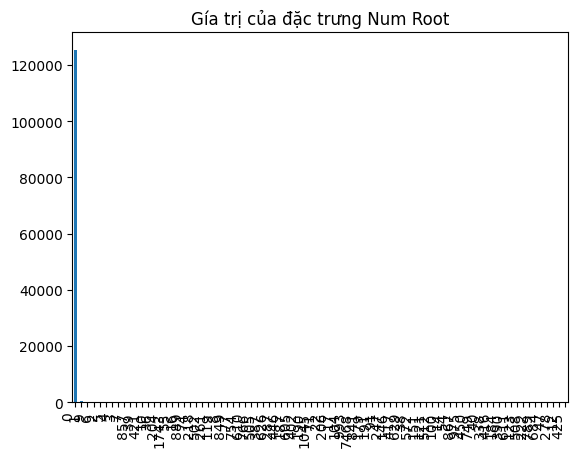

In [12]:
df_train['num_root'].value_counts().plot(kind="bar")
plt.title('Gía trị của đặc trưng Num Root')
plt.xticks(rotation=90, ha='right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

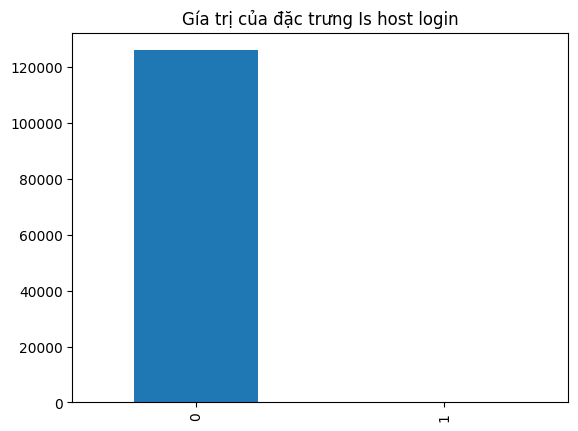

In [13]:
df_train['is_host_login'].value_counts().plot(kind="bar")
plt.title('Gía trị của đặc trưng Is host login')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

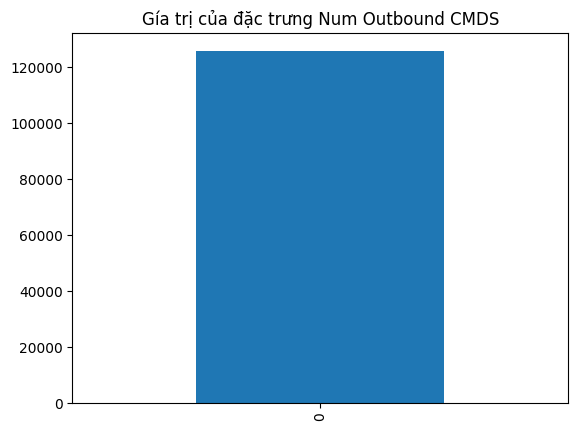

In [14]:
df_train['num_outbound_cmds'].value_counts().plot(kind="bar")
plt.title('Gía trị của đặc trưng Num Outbound CMDS')
plt.show

In [15]:
del df_train['num_outbound_cmds']
del df_train['is_host_login']
del df_train['num_root']

In [16]:
del df_test['num_outbound_cmds']
del df_test['is_host_login']
del df_test['num_root']

In [17]:
df_train.shape

(125973, 39)

**Nhận xét: Có thể loại bỏ Feature Num_outbound_cmds**

<Axes: >

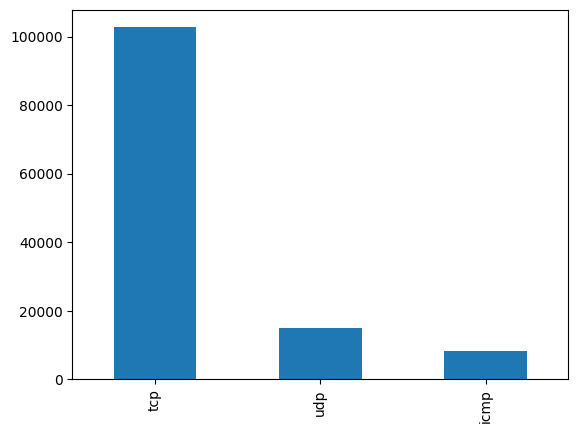

In [18]:
df_train['protocol_type'].value_counts().plot(kind="bar")

<Axes: >

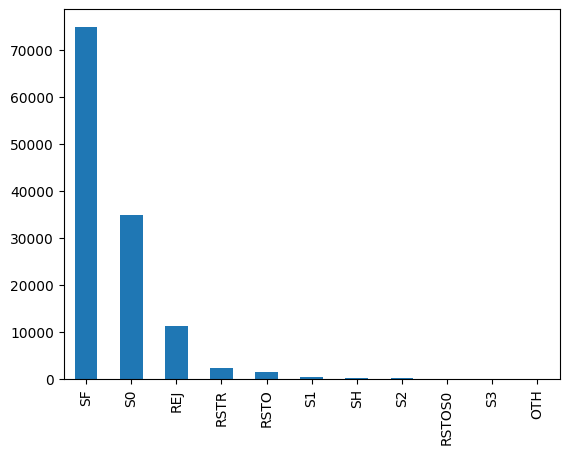

In [19]:
df_train['flag'].value_counts().plot(kind="bar")

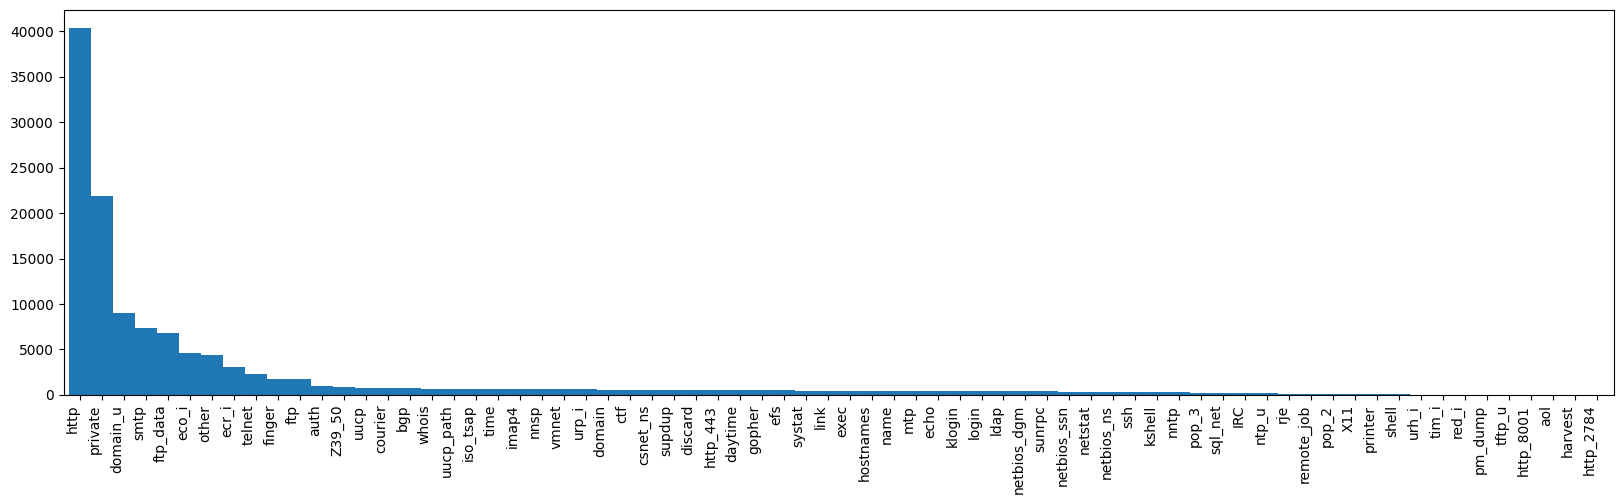

In [20]:
plt.figure(figsize=(20, 5))
df_train['service'].value_counts().plot(kind="bar", width=1)
plt.xticks(rotation=90, ha='right')
plt.show()

**Correlation giữa các Feartures**

<ipython-input-21-9534cb99d480>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_train.corr()


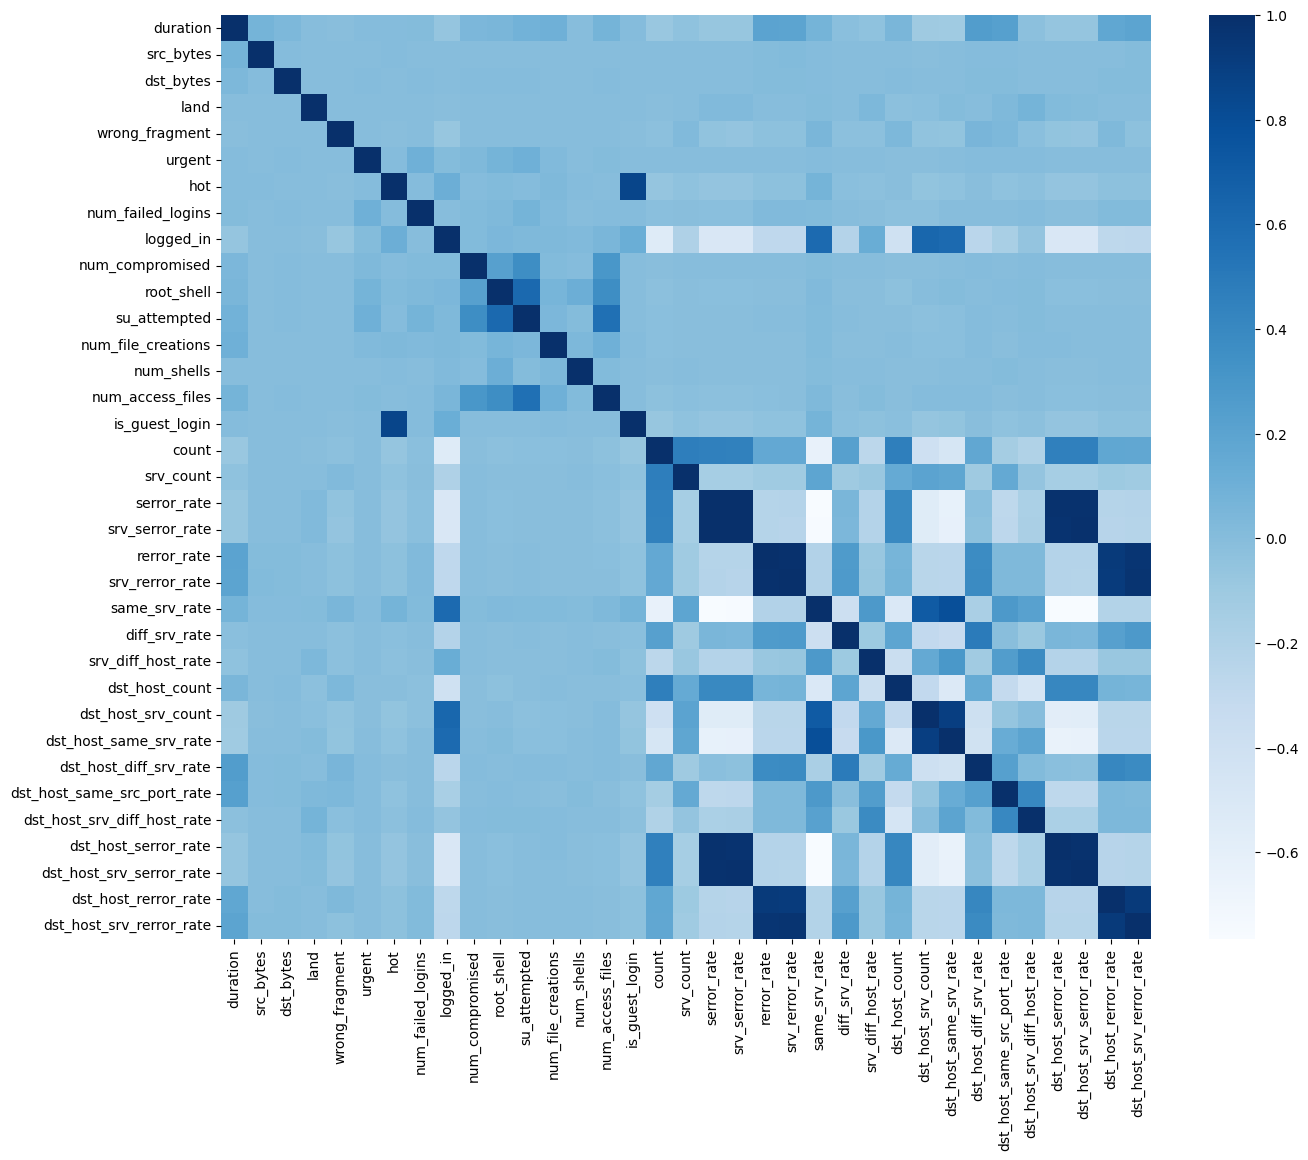

In [21]:
corr = df_train.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr, cmap="Blues")
plt.show()

**Features Choosing**

In [22]:
df_train.drop('service',axis = 1, inplace=True)
df_train.drop('src_bytes',axis = 1, inplace=True)
df_train.drop('dst_bytes',axis = 1, inplace=True)
df_train.drop('land',axis = 1, inplace=True)
df_train.drop('urgent',axis = 1, inplace=True)
df_train.drop('num_failed_logins',axis = 1, inplace=True)
df_train.drop('num_shells',axis = 1, inplace=True)
df_train.drop('srv_count',axis = 1, inplace=True)
df_train.drop('num_access_files',axis = 1, inplace=True)
df_train.drop('is_guest_login',axis = 1, inplace=True)
df_train.drop('duration',axis = 1, inplace=True)
df_train.drop('wrong_fragment',axis = 1, inplace=True)
df_train.drop('hot',axis = 1, inplace=True)
df_train.drop('num_compromised',axis = 1, inplace=True)
df_train.drop('root_shell',axis = 1, inplace=True)
df_train.drop('su_attempted',axis = 1, inplace=True)
df_train.drop('num_file_creations',axis = 1, inplace=True)
df_train.drop('dst_host_same_src_port_rate',axis = 1, inplace=True)
df_train.drop('dst_host_srv_diff_host_rate',axis = 1, inplace=True)

In [23]:
df_test.drop('service',axis = 1, inplace=True)
df_test.drop('src_bytes',axis = 1, inplace=True)
df_test.drop('dst_bytes',axis = 1, inplace=True)
df_test.drop('land',axis = 1, inplace=True)
df_test.drop('urgent',axis = 1, inplace=True)
df_test.drop('num_failed_logins',axis = 1, inplace=True)
df_test.drop('num_shells',axis = 1, inplace=True)
df_test.drop('srv_count',axis = 1, inplace=True)
df_test.drop('num_access_files',axis = 1, inplace=True)
df_test.drop('is_guest_login',axis = 1, inplace=True)
df_test.drop('duration',axis = 1, inplace=True)
df_test.drop('wrong_fragment',axis = 1, inplace=True)
df_test.drop('hot',axis = 1, inplace=True)
df_test.drop('num_compromised',axis = 1, inplace=True)
df_test.drop('root_shell',axis = 1, inplace=True)
df_test.drop('su_attempted',axis = 1, inplace=True)
df_test.drop('num_file_creations',axis = 1, inplace=True)
df_test.drop('dst_host_same_src_port_rate',axis = 1, inplace=True)
df_test.drop('dst_host_srv_diff_host_rate',axis = 1, inplace=True)

In [24]:
df_train.shape

(125973, 20)

In [25]:
df_test.shape

(22544, 20)

**FEATURES MAPPING**

In [26]:
df_train.head()

,protocol_type,flag,logged_in,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,tcp,SF,0,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.00,0.00,0.05,0.00,normal
1,udp,SF,0,13,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.00,0.00,0.00,0.00,normal
2,tcp,S0,0,123,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,1.00,1.00,0.00,0.00,neptune
3,tcp,SF,1,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.01,0.00,0.01,normal
4,tcp,SF,1,30,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,normal


Protocol Type

In [27]:
df_train['protocol_type'].value_counts()

tcp     102689
udp      14993
icmp      8291
Name: protocol_type, dtype: int64

In [28]:
df_test['protocol_type'].value_counts()

tcp     18508
udp      2701
icmp     1335
Name: protocol_type, dtype: int64

In [29]:
pmap = {'icmp' : 0, 'tcp' : 1, 'udp' : 2}
df_train['protocol_type'] = df_train['protocol_type'].map(pmap)

In [30]:
df_test['protocol_type'] = df_test['protocol_type'].map(pmap)

Flag

In [31]:
len(df_train['flag'].value_counts())

11

In [32]:
len(df_test['flag'].value_counts())

11

In [33]:
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df_train['flag'] = df_train['flag'].map(fmap)

In [34]:
df_test['flag'] = df_test['flag'].map(fmap)

In [35]:
df_train.dtypes

protocol_type                 int64
flag                          int64
logged_in                     int64
count                         int64
serror_rate                 float64
srv_serror_rate             float64
rerror_rate                 float64
srv_rerror_rate             float64
same_srv_rate               float64
diff_srv_rate               float64
srv_diff_host_rate          float64
dst_host_count                int64
dst_host_srv_count            int64
dst_host_same_srv_rate      float64
dst_host_diff_srv_rate      float64
dst_host_serror_rate        float64
dst_host_srv_serror_rate    float64
dst_host_rerror_rate        float64
dst_host_srv_rerror_rate    float64
labels                       object
dtype: object

**LABEL MAPPING**

In [36]:
df_train['labels'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: labels, dtype: int64

In [37]:
df_test['labels'].value_counts()

normal             11245
neptune             6654
satan                698
smurf                540
ipsweep              479
guess_passwd         411
portsweep            371
mscan                310
warezmaster          279
apache2              228
back                 227
processtable         211
nmap                 206
warezclient          107
teardrop             104
snmpguess             99
mailbomb              94
saint                 93
snmpgetattack         43
httptunnel            41
pod                   35
buffer_overflow       17
multihop               9
ps                     9
sendmail               8
xlock                  4
loadmodule             4
rootkit                4
xterm                  3
land                   2
imap                   2
ftp_write              2
named                  2
phf                    1
perl                   1
xsnoop                 1
Name: labels, dtype: int64

In [38]:
df_train['labels'] = df_train['labels'].apply(lambda x: 0 if x == 'normal' else 1)
df_test['labels'] = df_test['labels'].apply(lambda x: 0 if x == 'normal' else 1)

In [39]:
values_pie = df_train['labels'].value_counts()

In [40]:
values_pie_test = df_test['labels'].value_counts()

In [41]:
values_pie

0    67343
1    58630
Name: labels, dtype: int64

In [42]:
keys_pie = ['Normal', 'Attack']

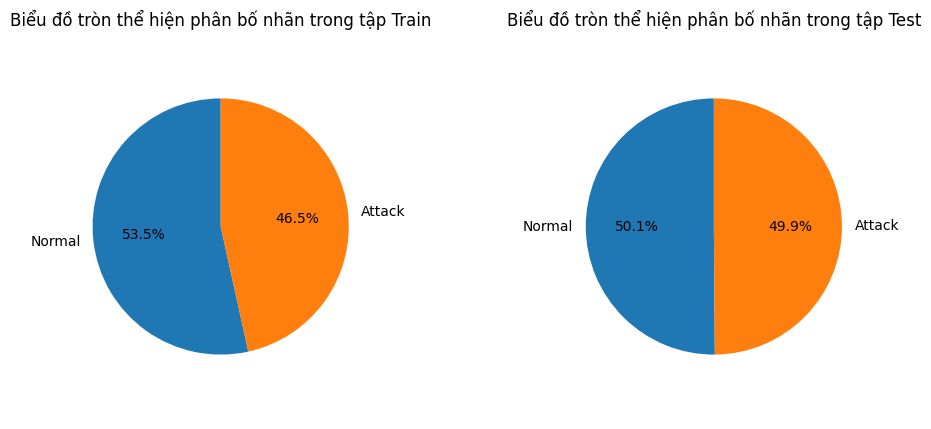

In [43]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Biểu đồ pie thứ nhất
axs[0].pie(values_pie, labels=keys_pie, autopct='%1.1f%%', startangle=90)
axs[0].set_title('Biểu đồ tròn thể hiện phân bố nhãn trong tập Train')

# Biểu đồ pie thứ hai
axs[1].pie(values_pie_test, labels=keys_pie, autopct='%1.1f%%', startangle=90)
axs[1].set_title('Biểu đồ tròn thể hiện phân bố nhãn trong tập Test')

# Đảm bảo đồ thị là hình tròn
axs[0].axis('equal')
axs[1].axis('equal')
plt.subplots_adjust(wspace=0.75)
# Hiển thị đồ thị
plt.show()

**Split data**

**Create Data Train and Data Val**

In [44]:
df_train.shape

(125973, 20)

In [45]:
X = df_train.iloc[:, :-1]
y = df_train.iloc[:, -1]

In [46]:
X

,protocol_type,flag,logged_in,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,1,0,0,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.00,0.00,0.05,0.00
1,2,0,0,13,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.00,0.00,0.00,0.00
2,1,1,0,123,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,1.00,1.00,0.00,0.00
3,1,0,1,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.01,0.00,0.01
4,1,0,1,30,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,1,1,0,184,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,1.00,1.00,0.00,0.00
125969,2,0,0,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.00,0.00,0.00,0.00
125970,1,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.72,0.00,0.01,0.00
125971,1,1,0,144,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,1.00,1.00,0.00,0.00


In [47]:
y

0         0
1         0
2         1
3         0
4         0
         ..
125968    1
125969    0
125970    0
125971    1
125972    0
Name: labels, Length: 125973, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]

In [50]:
X_test

,protocol_type,flag,logged_in,count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,1,0,1,1,0.00,0.0,0.00,0.0,1.00,0.00,0.00,180,57,0.11,0.02,0.00,0.0,0.87,0.0
1,2,0,0,192,0.00,0.0,0.00,0.0,0.99,0.01,0.01,194,155,0.80,0.02,0.00,0.0,0.00,0.0
2,2,0,0,121,0.00,0.0,0.00,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.00,0.0,0.00,0.0
3,2,0,0,2,0.00,0.0,0.00,0.0,1.00,0.00,0.00,255,2,0.01,0.84,0.00,0.0,0.00,0.0
4,1,3,0,2,0.00,0.0,1.00,1.0,1.00,0.00,0.00,255,2,0.01,0.68,0.00,0.0,1.00,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,1,2,0,395,0.06,0.0,0.93,1.0,0.00,1.00,0.00,255,1,0.00,1.00,0.09,0.0,0.91,1.0
22540,1,0,1,2,0.00,0.0,0.00,0.0,1.00,0.00,0.00,27,255,1.00,0.00,0.00,0.0,0.00,0.0
22541,1,1,0,202,1.00,1.0,0.00,0.0,0.05,0.07,0.00,255,25,0.10,0.07,1.00,1.0,0.00,0.0
22542,1,3,0,2,0.00,0.0,0.50,1.0,0.50,1.00,0.00,255,1,0.00,0.58,0.00,0.0,0.58,1.0


In [51]:
y_test

0        0
1        0
2        0
3        0
4        1
        ..
22539    1
22540    0
22541    1
22542    1
22543    0
Name: labels, Length: 22544, dtype: int64

**LABEL ENCODER**

In [52]:
from tensorflow.keras.utils import to_categorical
import numpy as np

In [53]:
y_train_encoder = to_categorical(y_train, num_classes=2)
y_train_encoder

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [54]:
y_val_encoder = to_categorical(y_val, num_classes=2)

In [55]:
correlations = X_train.corrwith(y_train)
print(correlations)

protocol_type              -0.281233
flag                        0.498349
logged_in                  -0.689971
count                       0.576997
serror_rate                 0.651517
srv_serror_rate             0.648987
rerror_rate                 0.253088
srv_rerror_rate             0.253507
same_srv_rate              -0.752780
diff_srv_rate               0.204456
srv_diff_host_rate         -0.118610
dst_host_count              0.377091
dst_host_srv_count         -0.722657
dst_host_same_srv_rate     -0.695116
dst_host_diff_srv_rate      0.244208
dst_host_serror_rate        0.652823
dst_host_srv_serror_rate    0.655604
dst_host_rerror_rate        0.252110
dst_host_srv_rerror_rate    0.253458
dtype: float64


In [56]:
correlations = X_test.corrwith(y_test)
print(correlations)

protocol_type              -0.267284
flag                        0.484224
logged_in                  -0.634873
count                       0.475984
serror_rate                 0.529636
srv_serror_rate             0.527424
rerror_rate                 0.344599
srv_rerror_rate             0.342378
same_srv_rate              -0.669917
diff_srv_rate               0.228541
srv_diff_host_rate         -0.108417
dst_host_count              0.374942
dst_host_srv_count         -0.666828
dst_host_same_srv_rate     -0.644497
dst_host_diff_srv_rate      0.241863
dst_host_serror_rate        0.530633
dst_host_srv_serror_rate    0.534790
dst_host_rerror_rate        0.345641
dst_host_srv_rerror_rate    0.338579
dtype: float64


In [ ]:
'''df_train.drop('src_bytes',axis = 1, inplace=True)
df_train.drop('dst_bytes',axis = 1, inplace=True)
df_train.drop('land',axis = 1, inplace=True)
df_train.drop('urgent',axis = 1, inplace=True)
df_train.drop('num_failed_logins',axis = 1, inplace=True)
df_train.drop('num_shells',axis = 1, inplace=True)
df_train.drop('srv_count',axis = 1, inplace=True)
df_train.drop('num_access_files',axis = 1, inplace=True)
df_train.drop('is_guest_login',axis = 1, inplace=True)
df_train.drop('duration',axis = 1, inplace=True)
df_train.drop('wrong_fragment',axis = 1, inplace=True)
df_train.drop('hot',axis = 1, inplace=True)
df_train.drop('num_compromised',axis = 1, inplace=True)
df_train.drop('root_shell',axis = 1, inplace=True)
df_train.drop('su_attempted',axis = 1, inplace=True)
df_train.drop('num_file_creations',axis = 1, inplace=True)
df_train.drop('dst_host_same_src_port_rate',axis = 1, inplace=True)
df_train.drop('dst_host_srv_diff_host_rate',axis = 1, inplace=True)
'''

In [ ]:
'''df_test.drop('src_bytes',axis = 1, inplace=True)
df_test.drop('dst_bytes',axis = 1, inplace=True)
df_test.drop('land',axis = 1, inplace=True)
df_test.drop('urgent',axis = 1, inplace=True)
df_test.drop('num_failed_logins',axis = 1, inplace=True)
df_test.drop('num_shells',axis = 1, inplace=True)
df_test.drop('srv_count',axis = 1, inplace=True)
df_test.drop('num_access_files',axis = 1, inplace=True)
df_test.drop('is_guest_login',axis = 1, inplace=True)
df_test.drop('duration',axis = 1, inplace=True)
df_test.drop('wrong_fragment',axis = 1, inplace=True)
df_test.drop('hot',axis = 1, inplace=True)
df_test.drop('num_compromised',axis = 1, inplace=True)
df_test.drop('root_shell',axis = 1, inplace=True)
df_test.drop('su_attempted',axis = 1, inplace=True)
df_test.drop('num_file_creations',axis = 1, inplace=True)
df_test.drop('dst_host_same_src_port_rate',axis = 1, inplace=True)
df_test.drop('dst_host_srv_diff_host_rate',axis = 1, inplace=True)'''

**Model**

In [57]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Input, Concatenate, Add, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout # importing dense layer
from tensorflow.keras.callbacks import ModelCheckpoint

In [58]:
focal_loss = tf.keras.losses.BinaryFocalCrossentropy(alpha=0.25, gamma=2.0)

In [59]:
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max', verbose=1)

In [ ]:
'''inputs = Input(shape=(34,1))
y = Conv1D(62, 3, padding="same", activation="relu", input_shape=(34,1))(inputs)
y = MaxPooling1D(pool_size=(2))(y)
y1 = Flatten()(y)

y = Dropout(0.5)(y)
y = Conv1D(62, 3, padding="same", activation="relu", input_shape=(34,1))(inputs)
y = MaxPooling1D(pool_size=(2))(y)
y2 = Flatten()(y)

y = Dropout(0.5)(y)
y = Conv1D(124, 3, padding="same", activation="relu", input_shape=(34,1))(inputs)
y = MaxPooling1D(pool_size=(2))(y)
y = Flatten()(y)
y = Dropout(0.5)(y)
y = Dense(256, activation="relu")(y)
y = Dropout(0.5)(y)
y = Dense(6, activation='softmax')(y)

y = Concatenate()([y, y1, y2])

outputs = Dense(6, activation='softmax')(y)
model = Model(inputs=inputs, outputs=outputs)'''

'inputs = Input(shape=(34,1))\ny = Conv1D(62, 3, padding="same", activation="relu", input_shape=(34,1))(inputs)\ny = MaxPooling1D(pool_size=(2))(y)\ny1 = Flatten()(y)\n\ny = Dropout(0.5)(y)\ny = Conv1D(62, 3, padding="same", activation="relu", input_shape=(34,1))(inputs)\ny = MaxPooling1D(pool_size=(2))(y)\ny2 = Flatten()(y)\n\ny = Dropout(0.5)(y)\ny = Conv1D(124, 3, padding="same", activation="relu", input_shape=(34,1))(inputs)\ny = MaxPooling1D(pool_size=(2))(y)\ny = Flatten()(y)\ny = Dropout(0.5)(y)\ny = Dense(256, activation="relu")(y)\ny = Dropout(0.5)(y)\ny = Dense(6, activation=\'softmax\')(y)\n\ny = Concatenate()([y, y1, y2])\n\noutputs = Dense(6, activation=\'softmax\')(y)\nmodel = Model(inputs=inputs, outputs=outputs)'

In [ ]:
'''model = Sequential()
#model.add(Dense(256, input_dim=34, activation='relu'))
#model.add(Dropout(0.3))
#model.add(LSTM(50, input_shape=(34, 1), return_sequences=True))''
#model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='softmax'))'''

"model = Sequential()\n#model.add(Dense(256, input_dim=34, activation='relu'))\n#model.add(Dropout(0.3))\n#model.add(LSTM(50, input_shape=(34, 1), return_sequences=True))''\n#model.add(Dropout(0.3))\nmodel.add(Dense(128, activation='relu'))\nmodel.add(Dropout(0.3))\nmodel.add(Dense(64, activation='relu'))\nmodel.add(Dropout(0.3))\nmodel.add(Dense(32, activation='relu'))\nmodel.add(Dropout(0.3))\nmodel.add(Dense(6, activation='softmax'))"

In [ ]:
'''model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=128, activation='relu', input_shape=(38, ),
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.01),

    tf.keras.layers.Dense(units=64, activation='relu',
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.01),


    tf.keras.layers.Dense(units=32, activation='relu',
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.01),

    tf.keras.layers.Dense(units=16, activation='relu',
                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),
                          bias_regularizer=regularizers.L2(1e-4),
                          activity_regularizer=regularizers.L2(1e-5)),
    tf.keras.layers.Dropout(0.01),

    tf.keras.layers.Dense(units=6, activation='sigmoid'),
])'''


"model = tf.keras.Sequential([\n    tf.keras.layers.Dense(units=128, activation='relu', input_shape=(38, ),\n                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),\n                          bias_regularizer=regularizers.L2(1e-4),\n                          activity_regularizer=regularizers.L2(1e-5)),\n    tf.keras.layers.Dropout(0.01),\n\n    tf.keras.layers.Dense(units=64, activation='relu',\n                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),\n                          bias_regularizer=regularizers.L2(1e-4),\n                          activity_regularizer=regularizers.L2(1e-5)),\n    tf.keras.layers.Dropout(0.01),\n\n\n    tf.keras.layers.Dense(units=32, activation='relu',\n                          kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4),\n                          bias_regularizer=regularizers.L2(1e-4),\n                          activity_regularizer=regularizers.L2(1e-5)),\n    tf.keras.layers.Dropout(0.01),\

In [60]:
input_layer = Input(shape=(19, 1))

# Convolutional Neural Network (CNN) branch
cnn_branch = Conv1D(64, kernel_size=3, activation='relu')(input_layer)
cnn_branch = MaxPooling1D(pool_size=2)(cnn_branch)
cnn_branch = Flatten()(cnn_branch)

# Recurrent Neural Network (RNN) branch
bidirectional_lstm_branch = Bidirectional(LSTM(64, return_sequences=True))(input_layer)
bidirectional_lstm_branch = Bidirectional(LSTM(64))(bidirectional_lstm_branch)

# Concatenate the outputs from both branches
merged = Concatenate()([cnn_branch, bidirectional_lstm_branch])

# Fully connected layers
dense_layer = Dense(units=128, activation='relu')(merged)
dense_layer = Dropout(0.01)(dense_layer)
dense_layer = Dense(units=64, activation='relu')(dense_layer)
dense_layer = Dropout(0.01)(dense_layer)
output_layer = Dense(2, activation='softmax')(dense_layer)
model = Model(inputs=input_layer, outputs=output_layer)

In [ ]:
'''model = Sequential() # initializing model
model.add(Conv1D(32, 3, padding="same",input_shape = (X_train.shape[1], 1), activation='relu'))
model.add(MaxPool1D(pool_size=(4)))
model.add(Dropout(0.2))
model.add(Conv1D(32, 3, padding="same", activation='relu'))
model.add(MaxPool1D(pool_size=(4)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=50))
# output layer with softmax activation
model.add(Dense(units=5,activation='softmax'))'''

'model = Sequential() # initializing model\nmodel.add(Conv1D(32, 3, padding="same",input_shape = (X_train.shape[1], 1), activation=\'relu\'))\nmodel.add(MaxPool1D(pool_size=(4)))\nmodel.add(Dropout(0.2))\nmodel.add(Conv1D(32, 3, padding="same", activation=\'relu\'))\nmodel.add(MaxPool1D(pool_size=(4)))\nmodel.add(Dropout(0.2))\nmodel.add(Flatten())\nmodel.add(Dense(units=50))\n# output layer with softmax activation\nmodel.add(Dense(units=5,activation=\'softmax\'))'

In [61]:
model.compile(loss=focal_loss,
                   optimizer=Adam(learning_rate=0.001),
                   metrics=['accuracy'])

In [62]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 19, 1)]              0         []                            
                                                                                                  
 conv1d (Conv1D)             (None, 17, 64)               256       ['input_1[0][0]']             
                                                                                                  
 max_pooling1d (MaxPooling1  (None, 8, 64)                0         ['conv1d[0][0]']              
 D)                                                                                               
                                                                                                  
 bidirectional (Bidirection  (None, 19, 128)              33792     ['input_1[0][0]']         

In [63]:
# Huấn luyện mô hình
a = model.fit(X_train, y_train_encoder, epochs = 2000, batch_size = 10000, validation_data = (X_val, y_val_encoder), callbacks=[checkpoint])

Epoch 1/2000
10/11 [==========================>...] - ETA: 0s - loss: 1.1372 - accuracy: 0.7728
Epoch 1: val_accuracy improved from -inf to 0.88268, saving model to best_model.h5
11/11 [==============================] - 33s 406ms/step - loss: 1.1318 - accuracy: 0.7736 - val_loss: 0.3308 - val_accuracy: 0.8827
Epoch 2/2000


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Epoch 751/2000
10/11 [==========================>...] - ETA: 0s - loss: 0.0045 - accuracy: 0.9933
Epoch 751: val_accuracy did not improve from 0.99218
11/11 [==============================] - 1s 122ms/step - loss: 0.0045 - accuracy: 0.9933 - val_loss: 0.0070 - val_accuracy: 0.9907
Epoch 752/2000
10/11 [==========================>...] - ETA: 0s - loss: 0.0039 - accuracy: 0.9935
Epoch 752: val_accuracy did not improve from 0.99218
11/11 [==============================] - 1s 121ms/step - loss: 0.0039 - accuracy: 0.9935 - val_loss: 0.0066 - val_accuracy: 0.9915
Epoch 753/2000
10/11 [==========================>...] - ETA: 0s - loss: 0.0035 - accuracy: 0.9941
Epoch 753: val_accuracy did not improve from 0.99218
11/11 [==============================] - 1s 124ms/step - loss: 0.0035 - accuracy: 0.9941 - val_loss: 0.0068 - val_accuracy: 0.9907
Epoch 754/2000
10/11 [==========================>...] - ETA: 0s - loss: 0.0033 - accuracy: 0.9945

**MODEL EVALUATE**

In [64]:
from tensorflow.keras.models import load_model
# Tải model từ file
model = load_model('/content/best_model.h5')

In [65]:
Test_array = model.predict(X_test)

705/705 [==============================] - 4s 4ms/step


In [66]:
import numpy as np
y_predict = np.argmax(Test_array, axis=-1)

In [67]:
y_predict

array([0, 0, 0, ..., 1, 1, 0])

In [68]:
from sklearn.metrics import accuracy_score
accuracy =  accuracy_score(y_test, y_predict)
accuracy * 100

92.32168204400284

In [69]:
import numpy as np
from sklearn.metrics import f1_score

# Tính F1 Macro
f1_macro = f1_score(y_test, y_predict, average='macro')

print("F1 Macro:", f1_macro)

F1 Macro: 0.9229035742271186


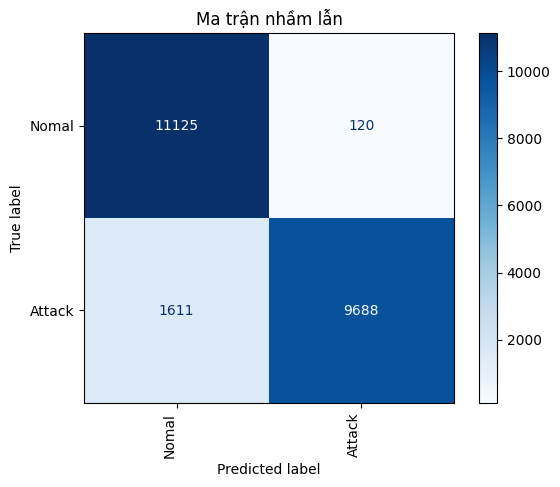

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Tính ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_predict)

# Vẽ biểu đồ ma trận nhầm lẫn
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Nomal', 'Attack'])
disp.plot(cmap='Blues')
plt.xticks(rotation=90, ha='right')
plt.title('Ma trận nhầm lẫn')
plt.show()


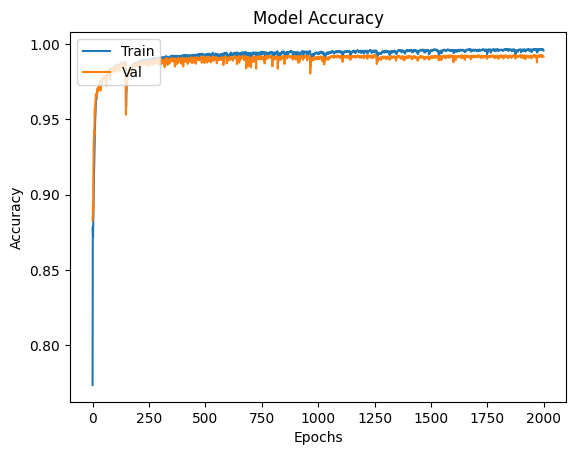

In [71]:
import matplotlib.pyplot as plt

plt.plot(a.history['accuracy'])
plt.plot(a.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

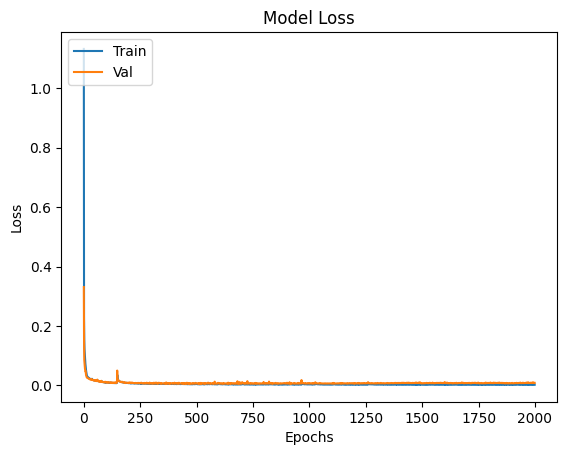

In [72]:
import matplotlib.pyplot as plt

plt.plot(a.history['loss'])
plt.plot(a.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()